In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv('./638_imagick_s_out.csv')
default_rss = 7395.83594

In [21]:
df.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
0,False,True,11055,secondary,13,15,11,13,15,23,...,False,False,13016,58929,43,392,19,default,False,7494.33203
1,True,False,47261,primary,1,6,3,23,6,44,...,True,True,656,154582,21,164,51,never,True,8570.34375
2,True,True,21804,secondary,10,1,15,21,3,80,...,True,False,8307,250345,70,280,28,never,False,7953.96484
3,False,False,32570,disabled,23,11,6,3,12,17,...,False,True,4133,93244,10,203,64,always,True,7824.48438
4,False,True,40587,disabled,21,13,13,16,3,54,...,True,False,15853,37446,80,215,76,never,False,7518.26953


In [22]:
df.nsmallest(10, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
46,True,False,601,disabled,3,1,1,5,10,2,...,True,False,5254,221100,6,142,55,default,True,7371.33594
49,True,False,636,disabled,6,1,1,5,10,3,...,True,False,2190,188276,9,142,54,never,True,7372.64844
47,True,False,1381,disabled,4,1,1,5,10,2,...,True,False,2190,221100,6,142,55,default,False,7376.34766
44,True,False,1613,primary,1,1,5,4,1,19,...,True,False,5254,231304,8,186,50,never,True,7377.26562
45,True,False,1613,primary,8,1,5,10,4,21,...,True,False,5254,239033,4,172,55,never,False,7381.47266
41,False,True,1728,secondary,11,1,3,10,5,30,...,True,False,5254,239033,7,176,55,never,True,7387.08594
43,False,True,1728,secondary,13,1,3,6,2,31,...,True,True,5254,239033,8,159,50,default,True,7388.11328
32,True,True,1613,secondary,8,3,3,3,1,33,...,False,False,5254,239033,8,200,55,never,True,7390.32812
48,True,False,1613,primary,2,1,1,4,12,12,...,True,False,2285,231304,8,141,50,never,False,7392.02344
37,True,True,2270,secondary,14,2,2,9,1,50,...,True,False,1892,219576,37,267,16,default,True,7442.64453


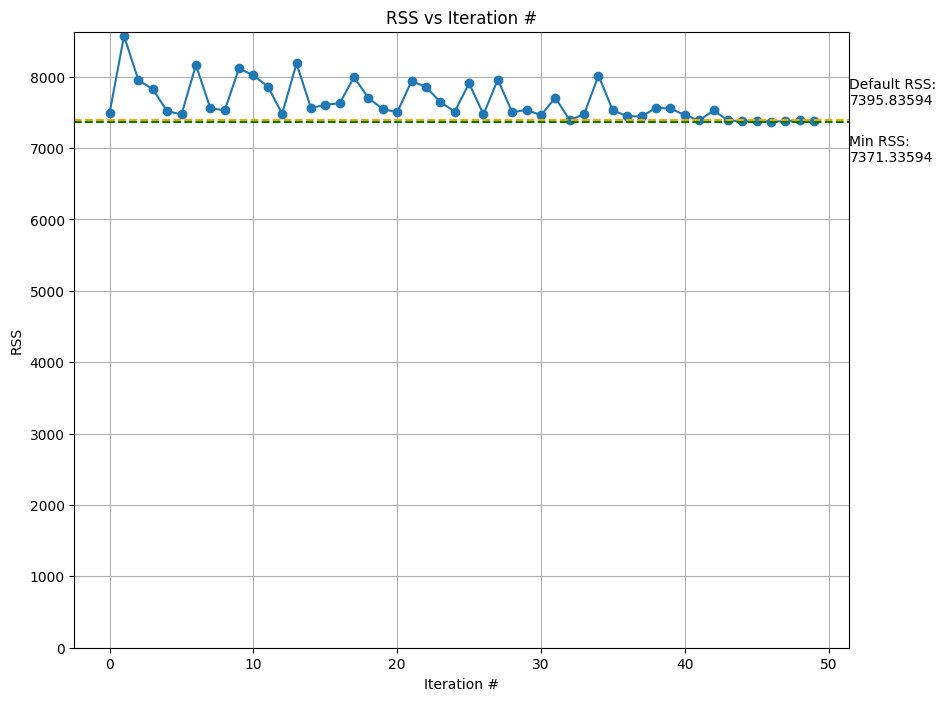

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df['rss'].min()
vertical_space = abs(default_rss - min_rss)
higher_line = max(default_rss, min_rss)
lower_line = min(default_rss, min_rss)

offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # 2% of y-axis range

if vertical_space < offset * 2:
    plt.axhline(y=default_rss, color='orange', linestyle='--')
    plt.text(plt.xlim()[1], higher_line + offset, f'{"Default" if higher_line == default_rss else "Min"} RSS:\n{higher_line:.5f}', 
             verticalalignment='bottom', 
             horizontalalignment='left')
    
    plt.axhline(y=min_rss, color='green', linestyle='--')
    plt.text(plt.xlim()[1], lower_line - offset, f'{"Default" if lower_line == default_rss else "Min"} RSS:\n{lower_line:.5f}', 
             verticalalignment='top', 
             horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [24]:
percent_diff = 100 * (default_rss - df['rss'].min()) / default_rss
percent_diff

np.float64(0.33126748887834306)